In [603]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [604]:
# Importing Data
df = pd.read_csv("DBSCAN_Data.csv")
X = df["Weight"]
Y = df["Height"]
df.head()


,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


<function matplotlib.pyplot.show(close=None, block=None)>

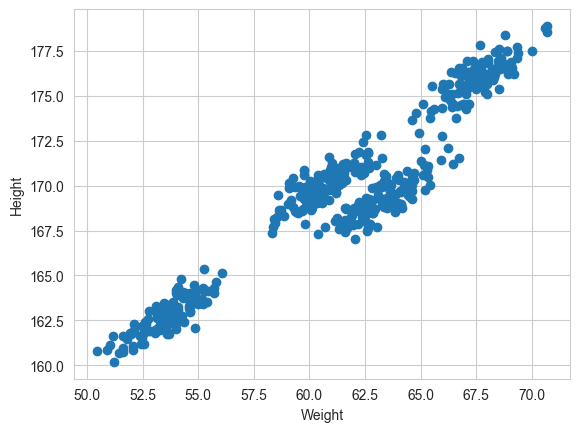

In [605]:
# Using a scatter plot to understand the possible no. of clusters
plt.scatter(X, Y)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show

In [606]:
# Function to find distance between 2 points
def distance(x1, y1, x2, y2):
    dist = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    return dist

# Function to count number of neighbors for a given radius
def neighbors(x, y, X, Y, rad):                 
    count = 0
    for i in range(len(X)):
        if(X[i]==x and Y[i]==y) : continue
        elif(distance(x, y, X[i],Y[i]) <= rad): count = count + 1
    return count

In [607]:
#defining no. of points in a radius for point to qualify as a core point
df["CorePoint"] = 0
closepoints = 5
rad = 0.5

for i in range(len(X)):
    count = neighbors(X[i], Y[i], X, Y, rad)
    if (count >= closepoints) : df["CorePoint"][i] = 1
    else : continue


C:\Users\verma\AppData\Local\Temp\ipykernel_31292\1440141113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (count >= closepoints) : df["CorePoint"][i] = 1
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\1440141113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (count >= closepoints) : df["CorePoint"][i] = 1
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\1440141113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


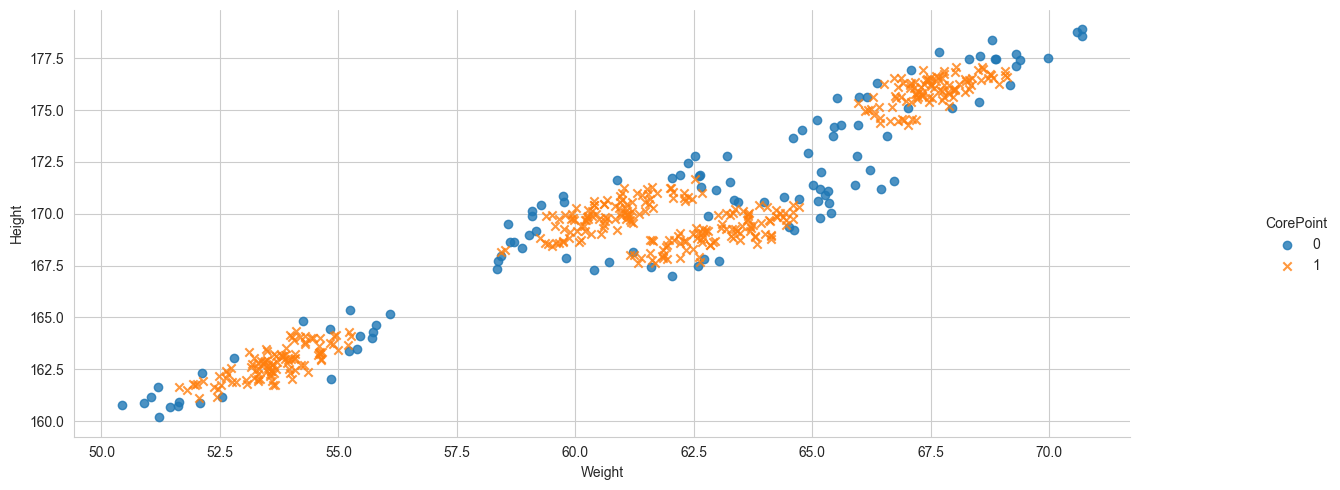

In [608]:
#Plotting core points and non core points
sns.set_style("whitegrid")
sns.lmplot(data=df,x='Weight',y='Height',hue='CorePoint',fit_reg=False,markers=['o','x']).fig.set_size_inches(15,5)

In [609]:
# Function that returns indexes of neighbors
def neighbors_index(x, y, X, Y, rad):                 
    l =[]
    for i in range(len(X)):
        if(X[i]==x and Y[i]==y) : continue
        elif(distance(x, y, X[i],Y[i]) <= rad) : l.append(i)
    return l    

In [610]:
# Introducing cluster field initially set to 0 for all data points. '0' signifies an unclustered point
df["Cluster"] = 0

In [611]:
# Assigns the same values to all the points in a cluster found recursively
def ClusterMaker(df, i):
    X = df["Weight"]
    Y = df["Height"]
    indexes = neighbors_index(X[i], Y[i], X, Y, 0.7)        # Using a different radius to differentiate clusters
    for j in indexes:
        if (df["CorePoint"][j] == 1 and df["Cluster"][j]!= df["Cluster"][i]):
            df["Cluster"][j] = df["Cluster"][i]
            ClusterMaker(df, j)
        else : df["Cluster"][j] = df["Cluster"][i]



In [612]:
# Finds the first unclustered core point
for i in range(len(df["Cluster"])):
    if (df["Cluster"][i] == 0 and df["CorePoint"][i] == 1) :
        print(i)
        break

0


In [613]:
# Assigns all points in the cluster with i = 0 the same cluster value
df["Cluster"][0] = 1
ClusterMaker(df, 0)

C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4137008886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][0] = 1
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][j] = df["Cluster"][i]
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : df["Cluster"][j] = df["Cluster"][i]


In [614]:
# Finds the next unclusterd core point
for i in range(len(df["Cluster"])):
    if (df["Cluster"][i] == 0 and df["CorePoint"][i] == 1) :
        print(i)
        break

2


In [615]:
# Assigns all points in the cluster with i = 2 the same cluster value
df["Cluster"][2] = 2
ClusterMaker(df, 2)

C:\Users\verma\AppData\Local\Temp\ipykernel_31292\2714147653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][2] = 2
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][j] = df["Cluster"][i]
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : df["Cluster"][j] = df["Cluster"][i]


In [616]:
# Finds the next unclusterd core point
for i in range(len(df["Cluster"])):
    if (df["Cluster"][i] == 0 and df["CorePoint"][i] == 1) :
        print(i)
        break

5


In [617]:
# Assigns all points in the cluster with i = 5 the same cluster value
df["Cluster"][5] = 3
ClusterMaker(df, 5)

C:\Users\verma\AppData\Local\Temp\ipykernel_31292\271451573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][5] = 3
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][j] = df["Cluster"][i]
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : df["Cluster"][j] = df["Cluster"][i]
C

In [618]:
# Finds the next unclusterd core point
for i in range(len(df["Cluster"])):
    if (df["Cluster"][i] == 0 and df["CorePoint"][i] == 1) :
        print(i)
        break

9


In [619]:
# Assigns all points in the cluster with i = 5 the same cluster value
df["Cluster"][9] = 4
ClusterMaker(df, 9)

C:\Users\verma\AppData\Local\Temp\ipykernel_31292\3173260360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][9] = 4
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"][j] = df["Cluster"][i]
C:\Users\verma\AppData\Local\Temp\ipykernel_31292\4118757030.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : df["Cluster"][j] = df["Cluster"][i]


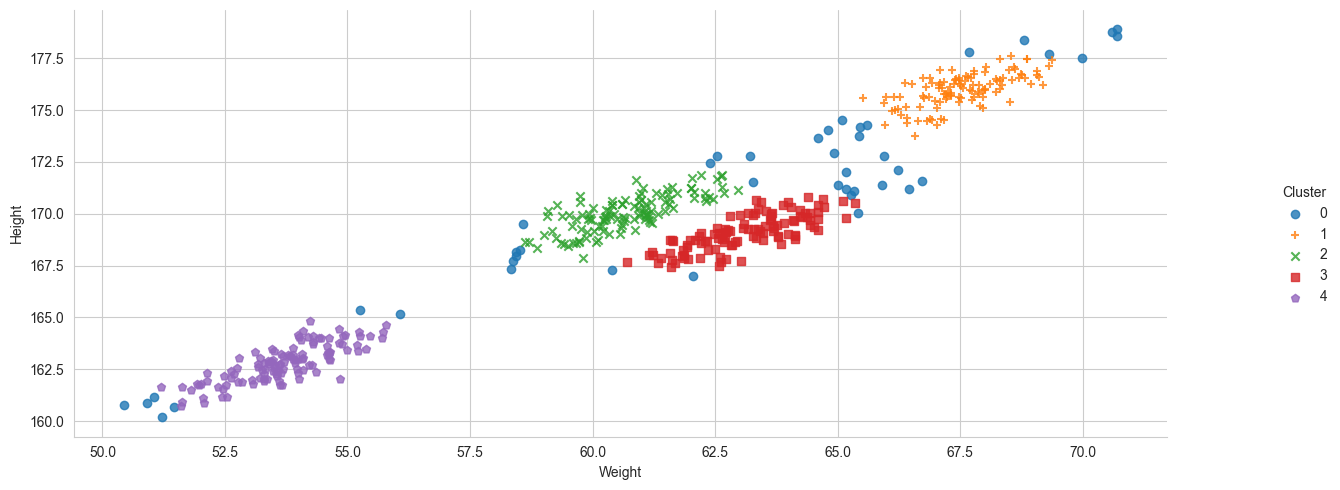

In [624]:
# Displays the final scatter plot with differently marked clusters
sns.set_style("whitegrid")
sns.lmplot(data=df,x='Weight',y='Height',hue='Cluster',fit_reg=False, markers = ['o','+','x','s','p'],).fig.set_size_inches(15,5)